In [641]:
import requests
import calendar
import time
import pandas as pd
import numpy as np
from datetime import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# pushshift is not up to date - you have to scrape from PRAW for updated data

# Retrieving

In [8]:
subreddits = ['Bitcoin', 'ethereum']

post_url = 'https://api.pushshift.io/reddit/search/submission'
comments_url = 'https://api.pushshift.io/reddit/search/comment'


In [9]:
pd.set_option('display.max_rows', 10)

In [10]:
datetime.utcnow()

datetime.datetime(2023, 1, 15, 17, 10, 7, 282046)

In [11]:
# the secret is to not call to much, but also not ask too much in a single call, and sleeping for 10 seconds between calls

# Sometimes the requests errors out but unixtime picks up where it left off

# from /r/pushshift: "It’s the somewhat normal pushshift api being flaky thing. It might get fixed in a few days or never. 
# Please go read the sticky if you haven’t already as it has more information and context that could be useful to you."

#removed_by_category == None

def postcall(subreddit):

    #  datetime.utcnow() = 'now',                    
    # time.mktime('x'.timetuple()) = converts to unix time,                
    # and int is int
    
    unixtime = int(time.mktime(datetime.utcnow().timetuple()))
    
    # collect epochs of posts in list
    posts = []
    
    try:
    
        for i in range(200):
            print(i)

            params = {
            "subreddit": subreddit,
            'filter': 'subreddit, id, selftext, title, created_utc, author, upvote_ratio, score, user_removed, mod_removed,retrieved_utc,updated_utc,num_comments',
            "limit": 50,
            'until': unixtime
            }

            res = requests.get(post_url, params)
            
            if res.status_code == 200:

                posts.append(res.json()["data"])

                unixtime = (res.json()["data"][-1]['created_utc'])
                
            else:
                print(res.status_code)


            
            
    except:
        print('failure', unixtime)
        print(res, res.status_code)

    return posts 

In [12]:
def commentscall(subreddit):

    #  datetime.utcnow() = 'now',                    
    # time.mktime('x'.timetuple()) = converts to unix time,                
    # and int is int
    
    unixtime = int(time.mktime(datetime.utcnow().timetuple()))
    
    # collect epochs of posts in list
    posts = []
    
    try:
    
        for i in range(200):
            print(i)

            params = {
            "subreddit": subreddit,
            'filter': 'subreddit, id, selftext, title, created_utc, author, upvote_ratio, score, user_removed, mod_removed,retrieved_utc,updated_utc,num_comments',
            "limit": 50,
            'until': unixtime
            }

            res = requests.get(comments_url, params)
            
            if res.status_code == 200:

                posts.append(res.json()["data"])

                unixtime = (res.json()["data"][-1]['created_utc'])
                
            else:
                print(res.status_code)


            
            
    except:
        print('failure', unixtime)
        print(res, res.status_code)

    return posts 

In [13]:
# These are the working celld for methods above. They take a while but are pretty robust. if ungainly - takes about 45 minutes to run,
# I recommend you go do something else for a bit. batching 100*50line calls x2 x5 seconds sleep plus call plus try / accept logic for 524 failures.

# I would like to improve this at some point

In [14]:
df_posts_bitcoin_list, df_posts_ethereum_list = [postcall(i) for i in subreddits]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
524
23
24
25
26
27
28
29
30
31
524
32
33
34
35
36
524
37
38
39
40
41
524
42
524
43
44
45
46
47
48
49
50
51
52
53
524
54
55
524
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
524
73
74
75
524
76
524
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
524
94
95
96
97
524
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
524
114
115
116
117
118
119
120
121
524
122
123
124
125
126
127
128
129
130
131
132
524
133
134
135
136
137
138
139
140
141
142
143
144
145
524
146
147
148
524
149
150
151
152
153
524
154
155
524
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
524
187
188
189
190
191
192
193
194
195
196
197
198
199
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
524
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
524
41
42
524
43
44
45
46
47
48
49
50
51
52
53
54
524
55
56
57
58
59
60
61
62
63
524
64
65
66
67
68
69
70
71
72
7

In [15]:
df_comments_bitcoin_list, df_comments_ethereum_list = [commentscall(i) for i in subreddits]

0
1
2
3
4
5
524
6
7
8
9
10
11
12
13
524
14
524
15
16
17
18
19
524
20
21
524
22
23
24
25
26
27
28
29
30
31
32
33
34
35
524
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
524
57
58
59
60
61
62
63
64
65
66
67
68
524
69
70
71
72
73
74
524
75
76
77
78
79
80
81
524
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
524
100
101
102
103
524
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
524
130
131
132
133
134
135
524
136
137
524
138
139
140
141
524
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
524
181
182
183
184
524
185
524
186
187
188
189
190
191
192
193
194
524
195
196
524
197
198
524
199
0
1
524
2
3
4
5
6
7
8
524
9
524
10
11
12
13
14
15
16
17
18
19
20
524
21
22
23
24
25
524
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
524
49
50
51
52
53
54
55
56
524
57
58
59
60
61
524
62
63
524
64
6

In [16]:
# grab btc
counter = 0

for epoch in df_posts_bitcoin_list:
    
    if counter == 0:
        df_btc = pd.DataFrame(epoch)
        counter = counter + 1
    else:
        df_btc = pd.concat([df_btc,pd.DataFrame(epoch)])

df_btc


,subreddit,selftext,title,upvote_ratio,score,id,author,num_comments,created_utc,retrieved_utc,updated_utc
0,Bitcoin,,Agree?,1.0,1,10couzs,Leading-Fail-7263,0,1673802339,1673802356,1673802356
1,Bitcoin,,"""Snow fall"" and ""The Matrix"" effects -- ASCII-Art",1.0,1,10coqos,mehdifarsi,0,1673802054,1673802069,1673802070
2,Bitcoin,,Bitcoin mining difficulty looks set to adjust ...,1.0,1,10cok36,Bitcoin_Maximalist,0,1673801613,1673801626,1673801626
3,Bitcoin,,Duck Tales (Inflation Lesson),1.0,1,10cojor,bitcorner22,0,1673801586,1673801601,1673801601
4,Bitcoin,,TFYM when you cashed out your IRA and dumped i...,1.0,1,10cofzx,DadAlphaDad,0,1673801335,1673801347,1673801348
...,...,...,...,...,...,...,...,...,...,...,...
45,Bitcoin,https://ikonic.click/sale/ \nClick on the link...,Invest your coin and earn x2 of your investment,1.0,1,z0rkcv,Bitcoin_support987,0,1669011819,1669011830,1669819628
46,Bitcoin,,"Just got to .1 from DCAing, it’s not a lot but...",1.0,1,z0rh1j,dAn_tHe_mAn7,0,1669011498,1669011513,1669819629
47,Bitcoin,"Hey guys, I'm looking for an answer to this qu...",Any quick or instant way to buy $100 worth of ...,1.0,1,z0rdtn,Blonde_girl713,0,1669011197,1669011211,1669819630
48,Bitcoin,Ask (and answer!) away! Here are the general r...,"Mentor Monday, November 21, 2022: Ask all your...",1.0,1,z0rbhg,rBitcoinMod,0,1669010983,1669010993,1669819630


In [17]:
# grab ethereum
counter = 0

for epoch in df_posts_ethereum_list:
    
    if counter == 0:
        df_eth = pd.DataFrame(epoch)
        counter = counter + 1
    else:
        df_eth = pd.concat([df_eth,pd.DataFrame(epoch)])

df_eth

,subreddit,selftext,title,upvote_ratio,score,id,author,num_comments,created_utc,retrieved_utc,updated_utc
0,ethereum,[removed],Movement,1.00,1,10cptda,MrAndreas06,0,1673804642,1673804653,1673804653
1,ethereum,,Understanding overcollateralized loans and aut...,1.00,1,10cn9t6,ccmanagement,0,1673798465,1673798477,1673798478
2,ethereum,,Ethereum is practically a Superset of Bitcoin,1.00,1,10cmp14,HotCitron2912,0,1673797010,1673797022,1673797023
3,ethereum,,"""85 Reasons to Use the Algorand Blockchain: Sc...",0.99,1,10cm9ng,unknownstranger2,0,1673795875,1673795885,1673795886
4,ethereum,,"I’m mining eth with HiveOS, my wallet stalled ...",1.00,1,10cm7je,AdLevel4943,0,1673795716,1673795732,1673795733
...,...,...,...,...,...,...,...,...,...,...,...
15,ethereum,,User review of the latest cross-chain token tr...,1.00,1,ylfr6o,Mortgage-Pitiful,0,1667511192,1667511203,1669825210
16,ethereum,"Hey fellow Redditors, I'm not sure if sharing...",Essay: Reducing the barrier for crypto using M...,1.00,1,ylek5s,whataheck,0,1667508730,1667508741,1669825224
17,ethereum,,Four Blockchains Making an Impact on the NFT M...,1.00,1,yld4jl,itsmeamirax,0,1667505745,1667505756,1669825243
18,ethereum,"\n\n**I already compare 35 exchanges**, mostl...",Hi for my staking and lending rates comparator...,1.00,1,ylcvo7,theablazefeces,0,1667505232,1667505245,1669825245


In [756]:
df_posts = pd.concat([df_btc, df_eth])

In [757]:
df_posts.shape

(12964, 11)

In [758]:
df_posts.head()

,subreddit,selftext,title,upvote_ratio,score,id,author,num_comments,created_utc,retrieved_utc,updated_utc
0,Bitcoin,,Agree?,1.0,1,10couzs,Leading-Fail-7263,0,1673802339,1673802356,1673802356
1,Bitcoin,,"""Snow fall"" and ""The Matrix"" effects -- ASCII-Art",1.0,1,10coqos,mehdifarsi,0,1673802054,1673802069,1673802070
2,Bitcoin,,Bitcoin mining difficulty looks set to adjust ...,1.0,1,10cok36,Bitcoin_Maximalist,0,1673801613,1673801626,1673801626
3,Bitcoin,,Duck Tales (Inflation Lesson),1.0,1,10cojor,bitcorner22,0,1673801586,1673801601,1673801601
4,Bitcoin,,TFYM when you cashed out your IRA and dumped i...,1.0,1,10cofzx,DadAlphaDad,0,1673801335,1673801347,1673801348


# Basic Cleaning

- Dates
- nans / [removed] / etc
- 

In [759]:
df_posts.subreddit.value_counts()

Bitcoin     8995
ethereum    3969
Name: subreddit, dtype: int64

In [760]:
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12964 entries, 0 to 19
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subreddit      12964 non-null  object 
 1   selftext       12964 non-null  object 
 2   title          12964 non-null  object 
 3   upvote_ratio   12964 non-null  float64
 4   score          12964 non-null  int64  
 5   id             12964 non-null  object 
 6   author         12964 non-null  object 
 7   num_comments   12964 non-null  int64  
 8   created_utc    12964 non-null  int64  
 9   retrieved_utc  12964 non-null  int64  
 10  updated_utc    12964 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 1.2+ MB


In [761]:
# some duplicates snuck in between calls
df_posts = df_posts.reset_index()

In [762]:
df_posts.subreddit.value_counts()['Bitcoin']

8995

# First, a little EDA w/cleaning

In [763]:
def modreporter(df, terms):
    for i in terms:
        for k in range(2):
            item_count = df['selftext'][df['selftext'] == i].groupby(df['subreddit']).count()[k]
            item_ratio = item_count / df_posts.subreddit.value_counts()[k]
            if k == 0:
                print(f"bitcoin {str(i)} ratio: {round(item_ratio,3)*100}")
            else:
                print(f"ethereum {str(i)} ratio: {round(item_ratio,3)*100}")

                
terms = ['[removed]', '[deleted]', '']

values = modreporter(df_posts, terms)

bitcoin [removed] ratio: 15.2
ethereum [removed] ratio: 37.7
bitcoin [deleted] ratio: 0.3
ethereum [deleted] ratio: 0.2
bitcoin  ratio: 51.0
ethereum  ratio: 42.199999999999996


In [764]:
import re
def formatting(df):
    
    #get datetime
    df['created_utc'] = pd.to_datetime(df['created_utc'],unit='s')
    df['post_date'] = df['created_utc'].dt.date
    df['post_time'] = df['created_utc'].dt.time
    
    # basic formatting 
    
    # lowercase formatting
    df = df.applymap(lambda x: x.lower() if type(x) == str else x)  
    
    # newlines
    for i in ['selftext', 'subreddit']:
        for line in df[i]:
            line = ''.join(line.splitlines())
        

    
    # hyperlinks: tough getting at all these hyperlinks
    for i in ['title', 'selftext']: 
        #hyperlinks
        df[i] = df[i].str.replace(r'^.*?\bhttps?://[^\s<>"]+|www\.[^\s<>"]+', "", regex = True).str.strip()
        df[i] = df[i].str.replace(r'\s*https?://\S+(\s+|$)', ' ', regex = True).str.strip()
        df[i] = df[i].str.replace(r'https?://\S+(\s+|$)', ' ', regex = True).str.strip()
    
    # Dupes
    #df = df.copy()
    #df.drop_duplicates(subset=['title', 'selftext'], keep="first", inplace = True)
    
    
    # Numbers 
    for i in ['title', 'selftext']:
        df[i] = df[i].str.strip().replace(r'\d+','', regex = True)

    # newlines (there is probably a better way to do this earlier in the query)
    df['selftext'] = df['selftext'].str.strip().replace(r'\n*','', regex = True)
    
    df['selftext'] = df['selftext'].str.replace('amp|amp|xb|xa|wa|don|gt', "", regex = True)
    
    # leftover garbage, html, weird lemmatizations, etc. 
    df['selftext'] = df['selftext'].str.strip().replace(r'\n*','', regex = True)
    df['selftext'] = df['selftext'].str.replace('amp|amp|xb|xa|wa|don|gt', "", regex = True)
    df['selftext'] = df['selftext'].str.strip().replace(r'\n*','', regex = True)

    # html
    df = df.apply(lambda x: x.str.strip().replace('\&\w*;', '', regex=True) if type(x) == str else x)
    
    
    # special charaacters except apostrophe
    for i in ['title', 'selftext']:
        df[i] = df[i].str.replace(r"[^\w\d'\s]+", " ", regex = True)
        
    # whitespace 
    for i in ['title', 'selftext']:
        df[i] = df[i].str.replace(r"\s+", " ", regex = True)

    return df



In [765]:
df_posts.shape

(12964, 12)

In [766]:
def filter_for_selftext(df):    
    df_selftext = df[(df['selftext'] != '[removed]') & (df['selftext'] != "")& (df['selftext'] != "[deleted]")]
    df_notext = df[(df['selftext'] != '[removed]') & (df['selftext'] != "[deleted]")]
    
    return df_selftext, df_notext

In [767]:
df_selftext, df_notext = filter_for_selftext(df_posts)

In [768]:
df_notext.shape

(10059, 12)

In [769]:
df_selftext.shape

(3802, 12)

In [770]:
df_posts = formatting(df_posts)
df_selftext = formatting(df_selftext)
df_notext = formatting(df_notext)

In [771]:
df_notext.shape

(10059, 14)

In [772]:
df_selftext.shape

(3802, 14)

In [773]:
df_posts.shape

(12964, 14)

In [774]:
def finalcleaner(df):
    df = df.copy()
    df.drop_duplicates(subset=['title', 'selftext'], keep="first", inplace = True)
    df.drop_duplicates(subset=None, keep="first", inplace=True)
    return df
    
df_posts = finalcleaner(df_posts)
df_selftext = finalcleaner(df_selftext)
df_notext.drop_duplicates(subset=['title'], keep="first", inplace = True)

In [775]:
df_posts.shape

(10899, 14)

In [776]:
df_selftext.shape

(3695, 14)

In [777]:
df_notext.shape

(9020, 14)

# EDA (thoughts for next notebook)

# Questions

1. Ads? 
2. Removed? Removed text?
3. How many are text vs. content?
4. Authorship
5. Title keywords
6. Text keywords
7. Title / text relationship
8. Price / timeseries

- Compare old time (pre-popular) subreddit to current


# Authorship

In [778]:
df_posts.groupby(['author']).score.sum()

author
--_--______---_---    3
--not--me--           1
-beef-supreme-        1
-captain_nemo-        1
-dazzler              1
                     ..
zuzka_123             2
zweistein1326         1
zxx5                  4
zyckra                1
zydsag                1
Name: score, Length: 6626, dtype: int64

In [779]:
# Get weightiness of users for split

# df.groupby(['Col X','Col Y']).size().unstack('Col Y', fill_value=0)

df_author_subs = df_posts.groupby(['author', 'subreddit']).size().unstack('subreddit', fill_value=0)


In [780]:
df_author_subs['total'] = df_author_subs['bitcoin'] + df_author_subs['ethereum']


In [781]:
df_author_subs['eth_ratio'] = df_author_subs['ethereum'] / df_author_subs['total']

In [782]:
df_author_subs.sort_values('eth_ratio', ascending = False)

subreddit,bitcoin,ethereum,total,eth_ratio
author,,,,
kodziak,0,1,1,1.0
daydayup007,0,1,1,1.0
deep_cut_nuggs,0,1,1,1.0
onelife2027,0,1,1,1.0
smedsterwho,0,3,3,1.0
...,...,...,...,...
halena766,1,0,1,0.0
hairy-fisherman7593,1,0,1,0.0
haimao,1,0,1,0.0


In [783]:
df_author_subs = df_author_subs.loc[df_author_subs.index != '[deleted]']

In [784]:
df_author_subs.sort_values('eth_ratio', ascending = False)

subreddit,bitcoin,ethereum,total,eth_ratio
author,,,,
kodziak,0,1,1,1.0
dayofshah,0,2,2,1.0
deep_will7229,0,1,1,1.0
deep_cut_nuggs,0,1,1,1.0
onelife2027,0,1,1,1.0
...,...,...,...,...
halena766,1,0,1,0.0
hairy-fisherman7593,1,0,1,0.0
haimao,1,0,1,0.0


In [785]:

df_author_subs.describe()

subreddit,bitcoin,ethereum,total,eth_ratio
count,6625.000000,6625.000000,6625.000000,6625.000000
mean,1.208604,0.419170,1.627774,0.263350
std,2.451760,2.100328,3.132734,0.432628
min,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.750000
max,107.000000,138.000000,138.000000,1.000000


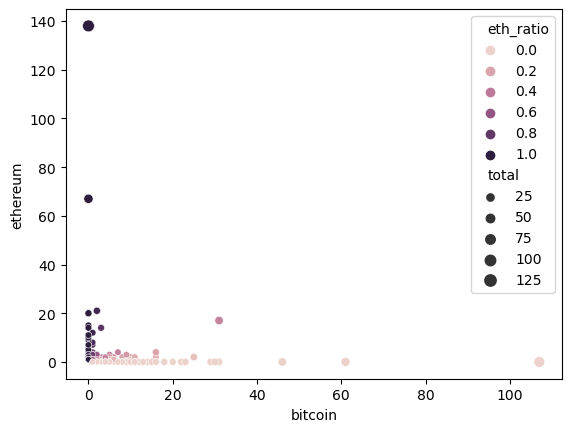

In [832]:
sns.scatterplot(data=df_author_subs, x="bitcoin", y="ethereum", hue = 'eth_ratio', size = 'total');

plt.

<AxesSubplot: xlabel='bitcoin', ylabel='eth_ratio'>

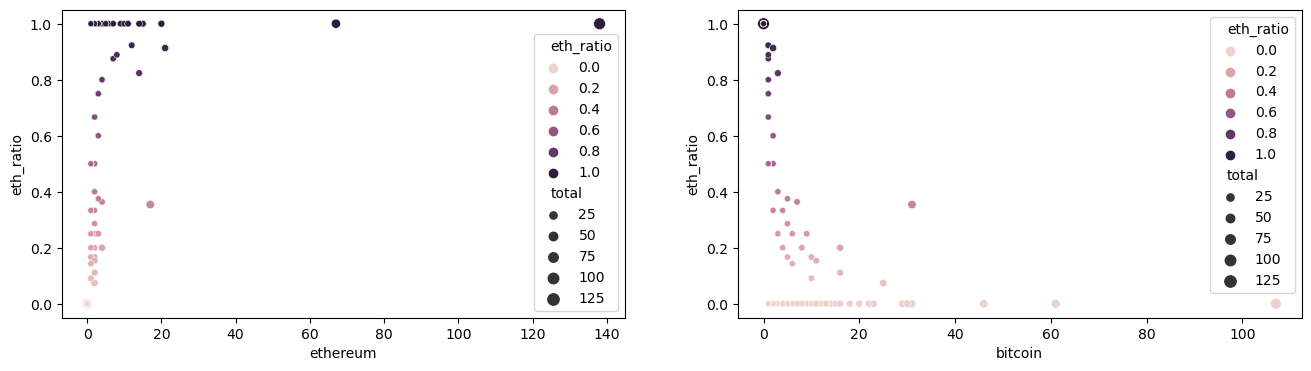

In [835]:
f, axes = plt.subplots(1, 2, figsize=(16,4))


sns.scatterplot(data=df_author_subs, x="ethereum", y="eth_ratio", hue = 'eth_ratio', size = 'total', ax=axes[0])
sns.scatterplot(data=df_author_subs, x="bitcoin", y="eth_ratio", hue = 'eth_ratio', size = 'total', ax=axes[1])




# wow that crossover is so minimal

In [838]:
df_author_subs[df_author_subs.total > 5].sort_values(by = 'eth_ratio', ascending = False)

subreddit,bitcoin,ethereum,total,eth_ratio
author,,,,
historical_walk6927,0,7,7,1.0
spiritual_grand_103,0,138,138,1.0
finley_dz,0,14,14,1.0
rainmateriall,0,6,6,1.0
swurveman,0,11,11,1.0
...,...,...,...,...
fiach_dubh,31,0,31,0.0
fit_rooster2702,6,0,6,0.0
fmorenol,6,0,6,0.0


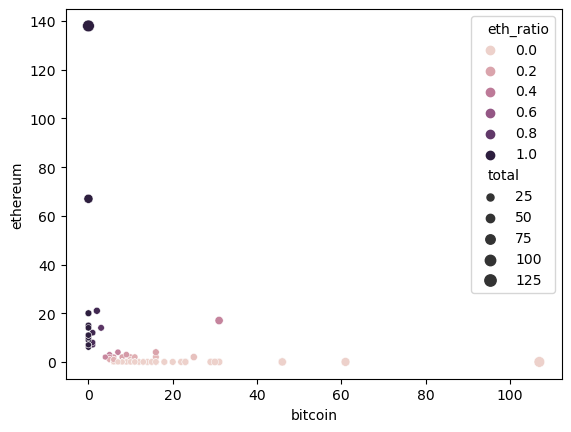

In [840]:
# No power users are split

sns.scatterplot(data=(df_author_subs[df_author_subs.total > 5]), x="bitcoin", y="ethereum", hue = 'eth_ratio', size = 'total');


In [621]:
df_author_subs.sort_values(by = 'bitcoin', ascending = False)
df_author_subs.loc[df_author_subs['author'] == '[deleted]']

KeyError: 'author'

# Authors


In [ ]:
df_posts.groupby('author').sort_values(by = num_comments)

In [556]:
df_posts.groupby('author')['score']

# final check

In [533]:
df_posts.head(2)

,index,subreddit,selftext,title,upvote_ratio,score,id,author,num_comments,created_utc,retrieved_utc,updated_utc,post_date,post_time
0,0,bitcoin,,agree,1.0,1,10couzs,leading-fail-7263,0,2023-01-15 17:05:39,1673802356,1673802356,2023-01-15,17:05:39
1,1,bitcoin,,snow fall and the matrix effects ascii art,1.0,1,10coqos,mehdifarsi,0,2023-01-15 17:00:54,1673802069,1673802070,2023-01-15,17:00:54


In [534]:
df_selftext = df_selftext.reset_index()
df_selftext.head(2)

,level_0,index,subreddit,selftext,title,upvote_ratio,score,id,author,num_comments,created_utc,retrieved_utc,updated_utc,post_date,post_time
0,5,5,bitcoin,i decided to play about with having my own lle...,cost of moving bitcoin off an exchange,1.0,1,10codid,siezard,0,2023-01-15 16:46:00,1673801175,1673801176,2023-01-15,16:46:00
1,9,9,bitcoin,keynesian economic theory is falling apart deb...,the new financial system is closer to fruition...,1.0,1,10cnlre,trollingguru,0,2023-01-15 16:14:39,1673799297,1673799297,2023-01-15,16:14:39


In [535]:
df_notext = df_notext.reset_index()
df_notext.head(2)

,level_0,index,subreddit,selftext,title,upvote_ratio,score,id,author,num_comments,created_utc,retrieved_utc,updated_utc,post_date,post_time
0,0,0,bitcoin,,agree,1.0,1,10couzs,leading-fail-7263,0,2023-01-15 17:05:39,1673802356,1673802356,2023-01-15,17:05:39
1,1,1,bitcoin,,snow fall and the matrix effects ascii art,1.0,1,10coqos,mehdifarsi,0,2023-01-15 17:00:54,1673802069,1673802070,2023-01-15,17:00:54


In [536]:
df_posts.drop(columns = 'index', inplace = True)
df_selftext.drop(columns = ['index', 'level_0'], inplace = True)
df_notext.drop(columns = ['index', 'level_0'], inplace = True)

In [537]:
df_notext.shape

(9020, 13)

In [538]:
df_selftext.shape

(3695, 13)

In [539]:
df_posts.shape

(10899, 13)

In [540]:
df_selftext.selftext.isna().sum()

0

In [541]:
df_posts.to_csv('../data/posts.csv', index = False)
df_selftext.to_csv('../data/selftext.csv', index = False)
df_notext.to_csv('../data/notext.csv', index = False)
#df_comments.to_csv('../data/comments.csv', index = False)

In [542]:
df_selftext.title.head()

0               cost of moving bitcoin off an exchange
1    the new financial system is closer to fruition...
2               xpub zpub ypub difference and multisig
3     btc were traded in venezuela last week using ...
4    do you think lightning network has struggled w...
Name: title, dtype: object